In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler

In [24]:
# Load the data
df = pd.read_csv('Concrete_Data.csv')
X = df.drop(['Concrete compressive strength(MPa, megapascals)'], axis=1)
y = df['Concrete compressive strength(MPa, megapascals)']

In [25]:
df.shape

(1030, 9)

In [26]:
df.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [27]:
description = df.describe()

# Selecting specific statistics
summary = description.loc[['count', 'mean', 'std', 'min', 'max']]

# Print or display the summary
print(summary)

       Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.167864   
std                                   104.506364   
min                                   102.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1030.000000       
mean                                           73.895825       
std                                            86.279342       
min                                             0.000000       
max                                           359.400000       

       Fly Ash (component 3)(kg in a m^3 mixture)  \
count                                 1030.000000   
mean                                    54.188350   
std                                     63.997004   
min                                      0.000000   
max                                  

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

<Axes: >

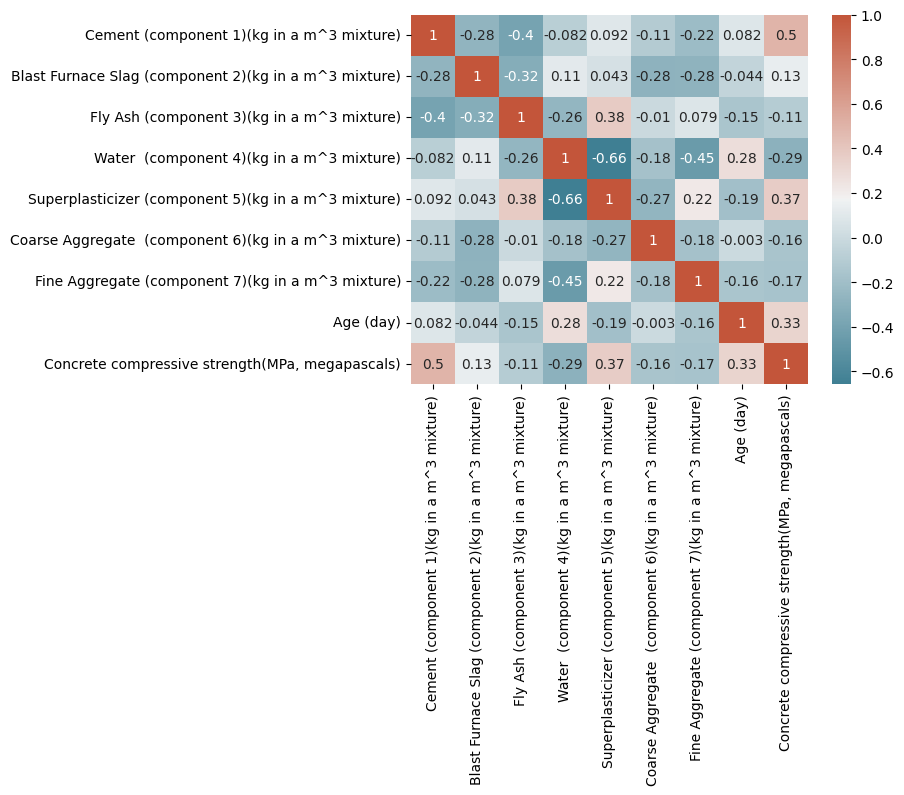

In [29]:
# Correlation matrix with heatmap and number
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [30]:
# normalization
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [31]:
# Split the data into training, validation, and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, train_size=0.9, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, train_size=8/9, random_state=0)

print(f"Training set: {len(X_train) / len(X) * 100:.2f}%")
print(f"Validation set: {len(X_val) / len(X) * 100:.2f}%")
print(f"Test set: {len(X_test) / len(X) * 100:.2f}%")

Training set: 80.00%
Validation set: 10.00%
Test set: 10.00%


In [32]:
# Initialize and train the RandomForestRegressor model
model_random_forest = RandomForestRegressor(n_estimators=500, random_state=1)
model_random_forest.fit(X_train, y_train)

c:\Python\Python311\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=500, random_state=1)

In [33]:
# Initialize and train the XGBoost regressor model
ensemble_size = 200
ensemble = XGBRegressor(n_estimators=ensemble_size, n_jobs=4,
max_depth=1, learning_rate=0.1,
objective ='reg:squarederror')

ensemble.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=4,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
# Compare model
r2_RF = r2_score(y_test, model_random_forest.predict(X_test))
rmse_RF = mean_squared_error(y_test, model_random_forest.predict(X_test)) ** 0.5

r2_XG = r2_score(y_test, ensemble.predict(X_test))
rmse_XG = mean_squared_error(y_test, ensemble.predict(X_test)) ** 0.5

print(f'R-Squared: {r2_RF}, MSE: {rmse_RF} (Random Forests)')
print(f'R-Squared: {r2_XG}, MSE: {rmse_XG} (XGBoost)')

R-Squared: 0.9201239033125743, MSE: 0.058150367489506555 (Random Forests)
R-Squared: 0.8487243413653495, MSE: 0.08002553253935997 (XGBoost)


In [35]:
# Define a function to calculate and print metrics
def calculate_metrics(model, X, y):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    r = r2 ** 0.5
    return mse, r2, r, predictions

In [36]:
# Calculate metrics for each dataset
mse_train, r2_train, r_train, pred_train = calculate_metrics(model_random_forest, X_train, y_train)
mse_val, r2_val, r_val, pred_val = calculate_metrics(model_random_forest, X_val, y_val)
mse_test, r2_test, r_test, pred_test = calculate_metrics(model_random_forest, X_test, y_test)

In [37]:
# Linear regression for the equations
def linear_regression(y_true, y_pred):
    reg = LinearRegression().fit(y_pred.reshape(-1, 1), y_true)
    return reg.coef_[0], reg.intercept_

In [38]:
coef_train, intercept_train = linear_regression(y_train, pred_train)
coef_val, intercept_val = linear_regression(y_val, pred_val)
coef_test, intercept_test = linear_regression(y_test, pred_test)

In [39]:
# Prepare the data for the table
table_data = {
    "Net": ["RandomForest [500 trees]"] * 3,
    "Set": ["Training", "Validation", "Testing"],
    "r": [r_train, r_val, r_test],
    "r^2": [r2_train, r2_val, r2_test],
    "Equation": [
        f"y={coef_train[0]:.3f}*x+{intercept_train[0]:.4f}",
        f"y={coef_val[0]:.3f}*x+{intercept_val[0]:.4f}",
        f"y={coef_test[0]:.3f}*x+{intercept_test[0]:.4f}"
    ],
    "RMSE": [mse_train ** 0.5, mse_val ** 0.5, mse_test ** 0.5]
}

In [40]:
# Create the DataFrame for the table
results_df = pd.DataFrame(table_data)
results_df

,Net,Set,r,r^2,Equation,RMSE
0,RandomForest [500 trees],Training,0.992173,0.984408,y=1.036*x+-0.0141,0.025717
1,RandomForest [500 trees],Validation,0.964730,0.930704,y=1.098*x+-0.0300,0.059136
2,RandomForest [500 trees],Testing,0.959231,0.920124,y=1.044*x+-0.0097,0.058150


In [41]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("regression.pkl","wb")
pickle.dump(model_random_forest, pickle_out)
pickle_out.close()

In [42]:
pickle_out = open("scaler_x.pkl","wb")
pickle.dump(scaler_X, pickle_out)
pickle_out.close()

In [43]:
pickle_out = open("scaler_y.pkl","wb")
pickle.dump(scaler_y, pickle_out)
pickle_out.close()

In [44]:
import numpy as np
input_data = np.array([[332.5,142.5,0.0,228.0,0.0,932.0,594.0,365]])

def normalize_input(input_data):
    normalized_data = scaler_X.transform(input_data)
    return normalized_data

def inverse_transform(prediction):
    # Mengecek apakah prediksi memiliki bentuk 1D
    if prediction.ndim == 1:
        # Reshape prediksi menjadi array 2D dengan satu fitur
        prediction = prediction.reshape(-1, 1)
    inverse_prediction = scaler_y.inverse_transform(prediction)
    return inverse_prediction

def predict_compressive_strength(input_data):
    normalized_input = normalize_input(input_data)
    prediction=model_random_forest.predict(normalized_input)
    return prediction

result = predict_compressive_strength(input_data)
original_prediction = inverse_transform(result)
original_prediction

c:\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[40.9077]])